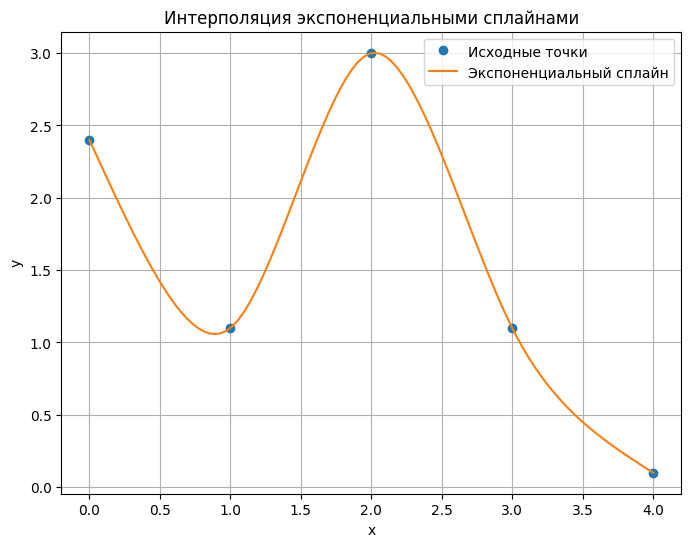

In [ ]:
import numpy as np

def exponential_spline(x, y, alpha=1):
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(x)
    
    n_segments = n - 1
    h = np.diff(x)
    
    n_vars = 4 * n_segments
    A = np.zeros((n_vars, n_vars))
    b = np.zeros(n_vars)
    row = 0

    # Уравнения для значений в узлах
    for i in range(n_segments):
        # S_i(x_i) = y_i
        A[row, 4*i] = 1          # a_i
        A[row, 4*i+2] = 1        # c_i
        A[row, 4*i+3] = 1        # d_i
        b[row] = y[i]
        row += 1
        
        # S_i(x_{i+1}) = y_{i+1}
        A[row, 4*i] = 1                          # a_i
        A[row, 4*i+1] = h[i]                      # b_i
        A[row, 4*i+2] = np.exp(alpha * h[i])      # c_i
        A[row, 4*i+3] = np.exp(-alpha * h[i])     # d_i
        b[row] = y[i+1]
        row += 1

    for i in range(n_segments-1):
        A[row, 4*i+1] = 1                                    # b_i
        A[row, 4*i+2] = alpha * np.exp(alpha * h[i])         # c_i
        A[row, 4*i+3] = -alpha * np.exp(-alpha * h[i])       # d_i
        A[row, 4*(i+1)+1] = -1                               # -b_{i+1}
        A[row, 4*(i+1)+2] = -alpha                           # -c_{i+1}
        A[row, 4*(i+1)+3] = alpha                            # d_{i+1}
        row += 1
        
        A[row, 4*i+2] = np.exp(alpha * h[i])                 # c_i
        A[row, 4*i+3] = np.exp(-alpha * h[i])                # d_i
        A[row, 4*(i+1)+2] = -1                               # -c_{i+1}
        A[row, 4*(i+1)+3] = -1                               # -d_{i+1}
        row += 1

    A[row, 2] = 1
    A[row, 3] = 1
    row += 1
    
    i = n_segments - 1
    A[row, 4*i+2] = np.exp(alpha * h[i])
    A[row, 4*i+3] = np.exp(-alpha * h[i])
    row += 1

    coeffs = np.linalg.solve(A, b)
    
    spline_coeffs = []
    for i in range(n_segments):
        a = coeffs[4*i]
        b_coef = coeffs[4*i+1]
        c = coeffs[4*i+2]
        d = coeffs[4*i+3]
        spline_coeffs.append((a, b_coef, c, d, x[i], alpha))
    
    def interpolate(x_query):
        x_query = np.asarray(x_query)
        result = np.zeros_like(x_query)
        for i, xi in enumerate(x_query):
            idx = np.searchsorted(x, xi) - 1
            idx = max(0, min(idx, n_segments-1))
            a, b, c, d, x0, alpha = spline_coeffs[idx]
            dx = xi - x0
            result[i] = a + b*dx + c*np.exp(alpha*dx) + d*np.exp(-alpha*dx)
        return result
    
    return interpolate

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    
    x = [0,1,2,3,4]        
    y = [2.4,1.1,3,1.1,0.1]

    spline = exponential_spline(x, y, alpha=2.3)

    xx = np.linspace(x[0], x[-1], 100)
    yy = spline(xx)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o', label='Исходные точки')
    plt.plot(xx, yy, label='Экспоненциальный сплайн')
    plt.title('Интерполяция экспоненциальными сплайнами')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()